In [16]:
import tensorflow as tf
print(tf.__version__)

1.11.0


In [17]:
mnist = tf.keras.datasets.mnist  # mnist is a dataset of 28x28 images of handwritten digits and their labels
(x_train, y_train),(x_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test

x_train = tf.keras.utils.normalize(x_train, axis=1)  # scales data between 0 and 1
x_test = tf.keras.utils.normalize(x_test, axis=1)  # scales data between 0 and 1

model = tf.keras.models.Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

model.fit(x_train, y_train, epochs=3)  # train the model

val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print("Model loss error is: %f" %val_loss)  # model's loss (error)
print("Accuracy is: %f" %val_acc)  # model's accuracy

Epoch 1/3
60000/60000 [==============================] - 6s 102us/step - loss: 0.2614 - acc: 0.9225
Epoch 2/3
60000/60000 [==============================] - 6s 93us/step - loss: 0.1058 - acc: 0.9680
Epoch 3/3
10000/10000 [==============================] - 0s 40us/step
Model loss error is: 0.109869
Accuracy is: 0.966200


### Finally, make predictions!

In [24]:
predictions = model.predict(x_test)

In [25]:
predictions

array([[3.21511290e-10, 1.48702611e-07, 1.86239640e-06, ...,
        9.99980807e-01, 1.26717170e-08, 3.29994077e-06],
       [1.11616805e-08, 2.78997439e-04, 9.99698877e-01, ...,
        5.50832517e-08, 5.64637759e-08, 1.68676694e-12],
       [9.15851444e-07, 9.99548256e-01, 1.62961885e-06, ...,
        2.77198502e-04, 1.34661313e-05, 6.25746725e-06],
       ...,
       [6.07005068e-09, 2.95245002e-07, 1.53095125e-09, ...,
        7.66370533e-07, 7.77167344e-08, 6.27325289e-06],
       [3.30869043e-05, 1.01654496e-06, 6.86072639e-08, ...,
        1.28189549e-05, 6.60881342e-04, 1.10542560e-05],
       [4.04897861e-07, 4.07582093e-08, 1.87214383e-07, ...,
        2.61234645e-10, 2.74214482e-08, 3.52303076e-09]], dtype=float32)

In [26]:
import numpy as np

print(np.argmax(predictions[0]))

7


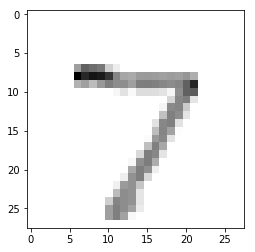

In [27]:
import matplotlib.pyplot as plt

plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()